In [ ]:
total_potential_triaxial = gp.CCompositePotential()
total_potential_triaxial['disk'] = gp.MiyamotoNagaiPotential(m = 1E11 , a=3, b=0.15, units=galactic)
total_potential_triaxial['bulge'] = gp.HernquistPotential(m = 3E9 , c = 0.67, units=galactic)
total_potential_triaxial = gp.NFWPotential(m=5E12,r_s=80, a=2, b=3, c=7, units=galactic)

In [ ]:
n_orbits = 1000

ics_a = gd.PhaseSpacePosition(pos = a_particle*u.kpc, 
                            vel = a_star_v*u.km/u.s)
ics_b = gd.PhaseSpacePosition(pos = b_star_p*u.kpc, 
                            vel = b_star_v*u.km/u.s)


new_pos_a = np.random.normal(ics_a.pos.xyz.to(u.pc).value, 0.01,
                           size=(n_orbits,3)).T*u.pc
new_vel_a = np.random.normal(ics_a.vel.d_xyz.to(u.km/u.s).value, 1,
                           size=(n_orbits,3)).T * u.km/u.s

new_ics_a = gd.PhaseSpacePosition(pos=new_pos_a, vel=new_vel_a)
orbit_a = gp.Hamiltonian(total_potential_triaxial).integrate_orbit(ics_a,  dt=0.5*u.Myr , t1=0, t2=10*u.Gyr)

orbits_total_a = gp.Hamiltonian(total_potential_triaxial).integrate_orbit(new_ics_a, dt=.5*u.Myr, t1=0, t2=10*u.Gyr)


new_pos_b = np.random.normal(ics_b.pos.xyz.to(u.pc).value, 0.01, 
                             size=(n_orbits,3)).T*u.pc
new_vel_b = np.random.normal(ics_b.vel.d_xyz.to(u.km/u.s).value, 1.,
                           size=(n_orbits,3)).T * u.km/u.s

new_ics_b = gd.PhaseSpacePosition(pos=new_pos_b, vel=new_vel_b)
orbit_b = gp.Hamiltonian(total_potential_triaxial).integrate_orbit(ics_b,  dt=0.5*u.Myr , t1=0, t2=10*u.Gyr)

orbits_total_b = gp.Hamiltonian(total_potential_triaxial).integrate_orbit(new_ics_b, dt=.5*u.Myr, t1=0, t2=10*u.Gyr)
    

Text(0.5, 1.0, 'DM potential and initial conditions')

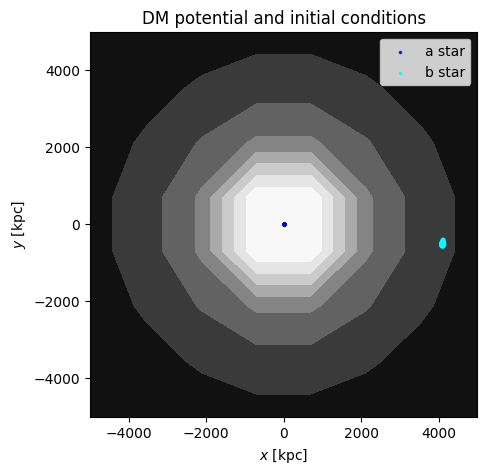

In [ ]:
grid = np.linspace(-5000,5000,8)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential_triaxial.plot_contours(grid=(grid, grid, 0), cmap='Greys', ax=ax)
fig = orbits_total_a[-1].plot(['x','y'], color='blue', s=10,  
                      alpha=0.8, axes=[ax], auto_aspect=False,
                      label='a star')
fig = orbits_total_b[-1].plot(['x','y'], color='cyan', s=10,
                              alpha=0.8, axes=[ax], auto_aspect=False,
                              label='b star')
ax.set_xlim(-5000,5000)
ax.set_ylim(-5000,5000)
ax.legend()
ax.set_title('Model with DM-triaxial and initial conditions')

(-15.0, 15.0)

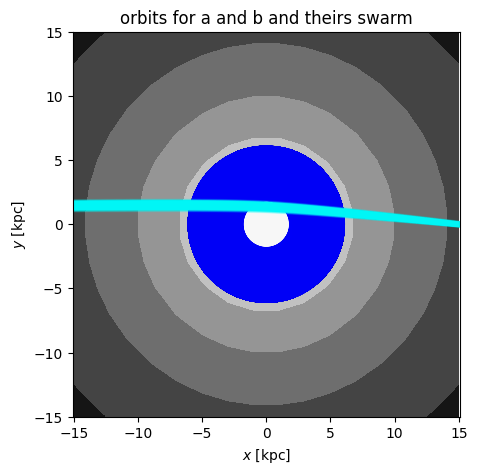

In [ ]:
grid = np.linspace(-15,15,16)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
fig = total_potential_triaxial.plot_contours(grid=(grid, grid, 0), cmap='Greys', ax=ax)
fig = orbits_total_a.plot(['x','y'], color='blue', axes=[ax], alpha=0.1, label='a star')
fig = orbits_total_b.plot(['x','y'], color='cyan', axes=[ax], alpha=0.1, label='b star')
ax.set_title('orbits for a and b and theirs swarm')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)


3. Graficar y observar evolucion de $\sigma_r$ y $\sigma_{\dot{r}}$.  
- sigma total
- sigma por componente ([x,y,z], [$\dot{x}, \dot{y}, \dot{z} $])

Nuestros parametros iniciales son:  
- a_star_p = [6,0,0]  
- a_star_v = [20,80,0]  
- b_star_p = [-100,0,0]
- b_star_v = [500,10,0]  
Las cuales estan en kiloparsec. Los $\sigma$ seran graficados en parsec. Por ende los errores son muy pequenitos. 

Text(0.5, 0.98, '$\\sigma_{r}$ for x, y, z \n blue for closed orbit and green for hiperbolic')

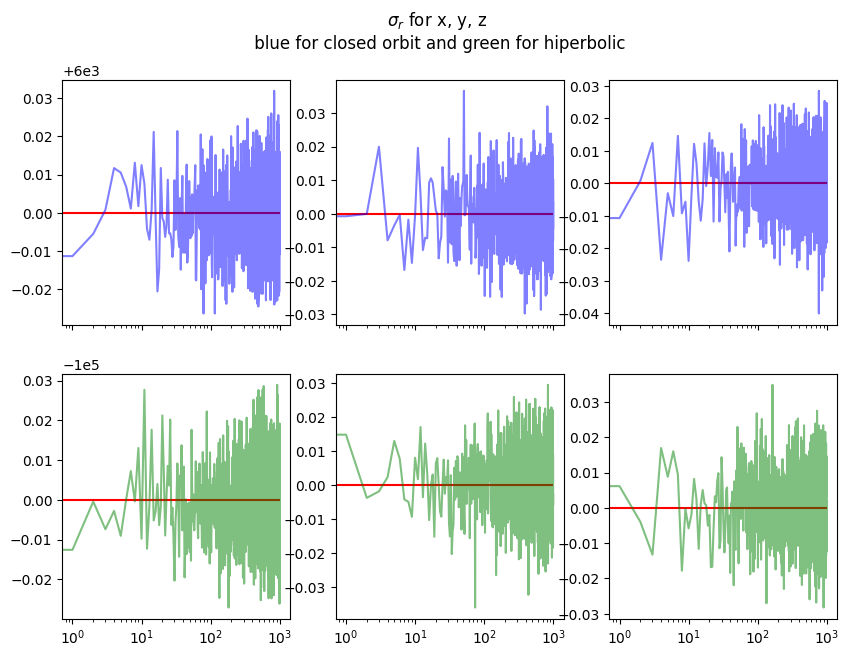

In [ ]:
fig, ax = plt.subplots(2,3, sharex=True, figsize=(10,7))
xdata= np.arange(0,1000)

#x
ax[0,0].hlines(y=6000, xmin=0, xmax=1000, color='red')
ax[0,0].plot(xdata, new_pos_a[0], color='blue', alpha=0.5)

ax[0,0].set_xscale('log')
ax[1,0].hlines(y=-100000, xmin=0, xmax=1000, color='red')
ax[1,0].plot(xdata, new_pos_b[0], color='green', alpha=0.5)

#y
ax[0,1].hlines(y=0, xmin=0, xmax=1000, color='red')
ax[0,1].plot(xdata, new_pos_a[1], color='blue', alpha=0.5)

ax[1,1].hlines(y=0, xmin=0, xmax=1000, color='red')
ax[1,1].plot(xdata, new_pos_b[1], color='green', alpha=0.5)


#z
ax[0,2].hlines(y=0, xmin=0, xmax=1000, color='red')
ax[0,2].plot(xdata, new_pos_a[2], color='blue', alpha=0.5)

ax[1,2].hlines(y=0, xmin=0, xmax=1000, color='red')
ax[1,2].plot(xdata, new_pos_b[2], color='green', alpha=0.5)

fig.suptitle('$\sigma_{r}$ for x, y, z \n blue for closed orbit and green for hiperbolic \n triaxial dm halo + disk + bulge')





Text(0.5, 0.98, '$\\sigma_{\\dot{r}}$ for x, y, z \n purple for closed orbit and gray for hiperbolic')

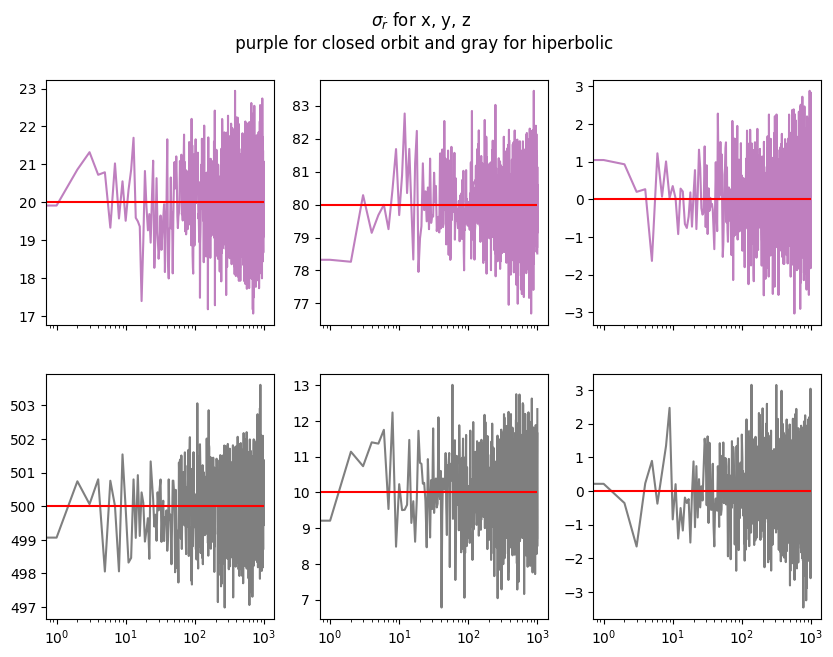

In [ ]:
fig, ax = plt.subplots(2,3, sharex=True, figsize=(10,7))
xdata= np.arange(0,1000)

ax[0,0].set_xscale('log')

ax[0,0].plot(xdata, new_vel_a[0], color='purple', alpha=0.5)
ax[0,0].hlines(y=20, xmin=0, xmax=1000, color='red')

ax[1,0].plot(xdata, new_vel_b[0], color='black', alpha=0.5)
ax[1,0].hlines(y=500,xmin=0, xmax=1000, color='red')

ax[0,1].plot(xdata, new_vel_a[1], color='purple', alpha=0.5)
ax[0,1].hlines(y=80, xmin=0, xmax=1000, color='red')

ax[1,1].plot(xdata, new_vel_b[1], color='black', alpha=0.5)
ax[1,1].hlines(y=10, xmin=0, xmax=1000, color='red')

ax[0,2].plot(xdata, new_vel_a[2], color='purple', alpha=0.5)
ax[0,2].hlines(y=0, xmin=0, xmax=1000, color='red')

#0
ax[1,2].plot(xdata, new_vel_b[2], color='black', alpha=0.5)
ax[1,2].hlines(y=0, xmin=0, xmax=1000, color='red')

fig.suptitle('$\sigma_{\dot{r}}$ for x, y, z \n purple for closed orbit and gray for hiperbolic \n triaxial dm halo + disk + bulge')



Si observamos y superponemos los graficos de posicion y velocidad para la misma componente donde ambos parten en cero, se puede notar lo visto en clases del paper de Gomez+2013, es decir, el comportamiento de x y $\dot{x}$ como sin y cos (ya que $\dot{x}$ es la derivada de x)

4. Tomar esferas de 1 y 2,5 kpc de radio, centradas a todo tiempo t, en la órbita central del enjambre.  
En cada paso de integración, calcular la densidad de partículas dentro de estas esferas.


In [ ]:
fig, anim = orbits_total_a[:1000].cylindrical.animate(components=['rho', 'z'],  
                                             stride=10)
anim.save('closedswarmorbit_triaxial.gif') 
plt.close() 

In [ ]:
fig, anim = orbits_total_b[:1000].cylindrical.animate(components=['rho', 'z'],  
                                             stride=10)
anim.save('hiperbolicswarmorbit_triaxial.gif') 
plt.close() 

Con las animaciones credas en la celda anterior, (closedswamorbit.gif y hiperbolicswarmorbit.gif), podemos observar que la densidad del enjambre aumenta a medida que se acerca mas a la parte mas masiva del potencial, y disminuye a medida que se aleja.

In [ ]:
density25 = []
density10 = []

for i in range(len(orbits_total_a.t)):
    difference = orbits_total_a.pos[i,:] - orbit_a.pos[i]
    distance_25 = difference.norm()/(2.5*u.kpc)
    distance_10 = difference.norm()/(1.0*u.kpc)
    
    pos_25 = np.where(distance_25<=1)[0]
    pos_10 = np.where(distance_10<=1)[0]
    
    densitypoints_25 = distance_25[pos_25]
    densitypoints_10 = distance_10[pos_10]
    
    vol25 = (4/3) * np.pi * (2.5**3)
    densitytotal_25 = len(densitypoints_25) / vol25
    density25.append(densitytotal_25)
    
    vol10 = (4/3) * np.pi * (1.0**3)
    densitytotal_10 = len(densitypoints_10) / vol10
    density10.append(densitytotal_10)
       
    
    

In [ ]:
density25b = []
density10b = []

for i in range(len(orbits_total_b.t)):
    difference = orbits_total_b.pos[i,:] - orbit_b.pos[i]
    distance_25b = difference.norm()/(2.5*u.kpc)
    distance_10b = difference.norm()/(1.0*u.kpc)
    
    pos_25b = np.where(distance_25b<=1)[0]
    pos_10b = np.where(distance_10b<=1)[0]
    
    densitypoints_25b = distance_25b[pos_25b]
    densitypoints_10b = distance_10b[pos_10b]
    
    vol25b = (4/3) * np.pi * (2.5**3)
    densitytotal_25b = len(densitypoints_25b) / vol25b
    density25b.append(densitytotal_25b)
    
    vol10b = (4/3) * np.pi * (1.0**3)
    densitytotal_10b = len(densitypoints_10b) / vol10b
    density10b.append(densitytotal_10b)

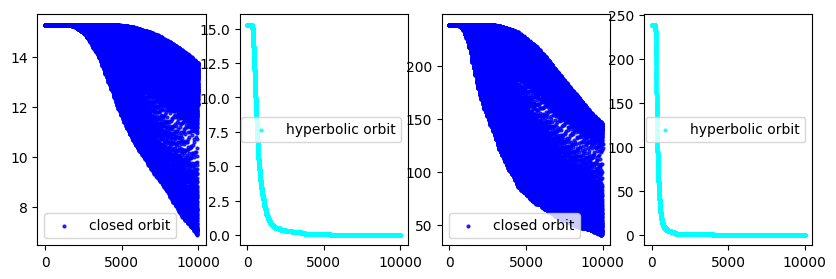

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(10,3))
ax[0].scatter(orbits_total_a.t, density25, s=4, 
              alpha=0.8, color='blue', label='closed orbit')
ax[1].scatter(orbits_total_b.t, density25b, s=4, 
              alpha=0.8, color='cyan', label='hyperbolic orbit' )

ax[2].scatter(orbits_total_a.t, density10,
              s=4, alpha=0.8, color='blue', label='closed orbit')
ax[3].scatter(orbits_total_b.t, density10b,
              s=4, alpha=0.8, color='cyan', label='hyperbolic orbit')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()